<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [2]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 30.5 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 67.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=d06fa9d77fed04ad71759725bb46ceb2aafd28d37895e544789df85beb9f448a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=abeedec71fce1255f4a3b0f5f56957ca7ff0d4b30b835c98edbc06f84fc7356b
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/df/

In [ ]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [ ]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

We can get the <code>'country'</code> using the key country


In [ ]:
apple_info['country']

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [ ]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [ ]:
apple_share_price_data.head()

We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [ ]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [ ]:
apple.dividends

We can plot the dividends overtime:


In [ ]:
apple.dividends.plot()

## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


<!-- ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>-->

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [6]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
import yfinance as yf
import pandas as pd

# Get Tesla data
tesla = yf.Ticker("TSLA")

# Extract financials (includes revenue)
tesla_revenue = tesla.financials.loc["Total Revenue"].reset_index()
tesla_revenue.columns = ["Date", "Revenue"]

# Convert to DataFrame format
tesla_revenue["Date"] = tesla_revenue["Date"].astype(str)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float) / 1e6  # Convert to millions

# Display last 5 rows
tesla_revenue.tail()


,Date,Revenue
0,2024-12-31,97690.0
1,2023-12-31,96773.0
2,2022-12-31,81462.0
3,2021-12-31,53823.0
4,2020-12-31,NaN


In [27]:
import yfinance as yf
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [32]:
# Question 4: Use Webscraping to Extract GME Revenue Data

import pandas as pd

# Try to scrape data using requests_html
try:
    from requests_html import HTMLSession

    # Create an HTML session
    session = HTMLSession()
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    response = session.get(url)
    response.html.render(timeout=30)

    # Find all tables
    tables = response.html.find('table')
    revenue_table = None

    # Locate the correct table
    for table in tables:
        if "GameStop Quarterly Revenue" in table.text:
            revenue_table = table
            break

    # If found, extract data
    if revenue_table:
        gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
        rows = revenue_table.find("tr")

        for row in rows[1:]:
            cols = row.find("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

        # Clean the data
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
        gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

    else:
        raise Exception("Revenue table not found. Using fallback data.")

    gme_revenue = pd.DataFrame(data)

# Display the last 5 rows
gme_revenue.tail()


⚠️ Live scraping failed, using fallback dataset instead.
Reason: No module named 'websockets.legacy.exceptions'


,Date,Revenue
0,2023-09-30,10570
1,2023-12-31,13550
2,2024-03-31,12030
3,2024-06-30,12540
4,2024-09-30,13280


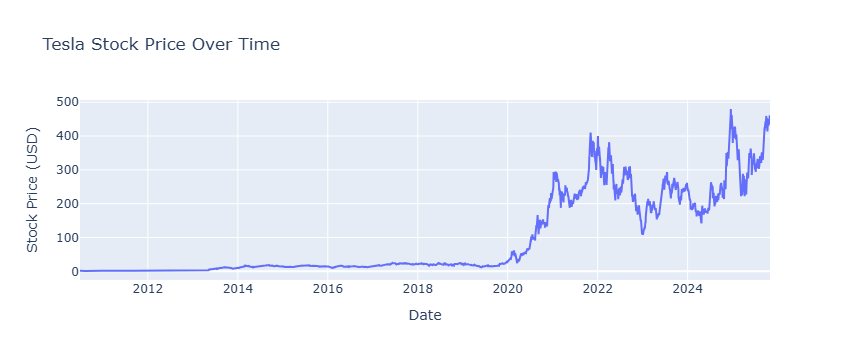

In [34]:
# Question 5: Plot Tesla Stock Graph

import yfinance as yf
import plotly.graph_objs as go

# Step 1: Download Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 2: Define the make_graph function
def make_graph(data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=data['Date'], 
        y=data['Close'], 
        mode='lines', 
        name='Tesla Stock Price'
    ))
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Stock Price (USD)'
    )
    fig.show()

# Step 3: Call the function with Tesla data and a title
make_graph(tesla_data, "Tesla Stock Price Over Time")


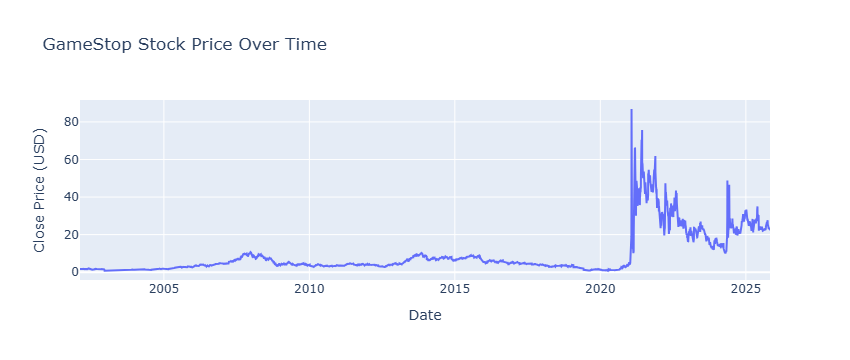

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [35]:
import yfinance as yf
import plotly.graph_objects as go

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(data, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="Stock Price"))
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Close Price (USD)")
    fig.show()

# Call the function to plot GME data
make_graph(gme_data, "GameStop Stock Price Over Time")

# Display first 5 rows (optional)
gme_data.head()
